# JBI100 Visualization 
### Academic year 2024-2025

## Incidents and Accidents
Data sources:

- Australian Shark Incidents (https://github.com/cjabradshaw/AustralianSharkIncidentDatabase)
- Railroad Incidents (https://data.transportation.gov/Railroads/Railroad-Equipment-Accident-Incident-Source-Data-F/aqxq-n5hy/about_data)
- Work-related Injury and Illness (https://www.osha.gov/Establishment-Specific-Injury-and-Illness-Data)

Data dictionaries and additional info can be found in the respective data folders.
Note: you only need to select one dataset for your project.

In [4]:
# Import libraries
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os
import seaborn as sns

# Do not truncate tables
pd.set_option('display.max_columns', None)

# If you receive a 'ModuleNotFoundError' please install the according library. 
# This can be done from within the Jupyter environment with the command 
#'!python3 -m pip install lib' where lib is the according library name.
df_railroad = pd.read_csv('../Railroad Incidents/Railroad_Equipment_Accident_Incident_Source_Data__Form_54__20241026.csv', delimiter=',', low_memory=False)


FileNotFoundError: [Errno 2] No such file or directory: '../Railroad Incidents/Railroad_Equipment_Accident_Incident_Source_Data__Form_54__20241026.csv'

## Explore Railroad Incident data

In [96]:
df_railroad['RAILROAD'].unique()

array(['ARR', 'IC', 'NS', ..., 'WN', 'RJCV', 'BEEM'], dtype=object)

In [51]:
df_railroad.describe()

,IYR,IMO,IYR2,IMO2,IYR3,IMO3,YEAR,MONTH,DAY,TIMEHR,TIMEMIN,TYPE,CARS,CARSDMG,CARSHZD,EVACUATE,STATE,TEMP,VISIBLTY,WEATHER,TRNSPD,TONS,POSITON1,CARNBR2,POSITON2,HEADEND1,MIDMAN1,MIDREM1,RMAN1,RREM1,HEADEND2,MIDMAN2,MIDREM2,RMAN2,RREM2,LOADF1,LOADP1,EMPTYF1,EMPTYP1,CABOOSE1,LOADF2,LOADP2,EMPTYF2,EMPTYP2,CABOOSE2,EQPDMG,TRKDMG,CASKLDRR,CASINJRR,CASKLD,CASINJ,HIGHSPD,ACCDMG,DUMMY2,TOTINJ,DUMMY3,TOTKLD,ENGRS,FIREMEN,CONDUCTR,BRAKEMEN,ENGHR,ENGMIN,CDTRHR,CDTRMIN,JOINTCD,REGION,DUMMY5,NARRLEN,YEAR4,RREMPKLD,RREMPINJ,PASSKLD,PASSINJ,OTHERKLD,OTHERINJ,CNTYCD,ALCOHOL,DRUG,Latitude,Longitud,SIGNAL
count,220087.000000,220087.000000,19104.000000,19104.000000,220075.000000,220075.000000,220087.000000,220087.000000,220087.000000,219971.000000,219971.000000,220085.000000,220087.000000,220087.000000,220087.000000,220087.000000,220087.000000,220087.000000,219848.000000,219695.000000,220085.000000,220087.000000,206731.000000,26040.000000,102480.000000,220087.000000,220087.000000,220087.000000,220087.000000,220087.000000,220087.000000,220087.000000,220087.000000,220087.000000,220087.000000,220087.000000,220087.000000,220087.000000,220087.000000,220087.000000,220087.000000,220087.000000,220087.000000,220087.000000,220087.000000,2.200870e+05,2.200870e+05,220087.000000,220087.000000,220087.000000,220087.000000,220087.000000,2.200870e+05,0.0,220087.000000,170341.000000,220087.000000,194445.000000,179994.000000,192510.000000,186233.000000,173114.000000,164501.000000,167504.000000,159903.000000,220087.000000,220087.000000,135068.000000,220087.000000,220087.000000,220087.000000,220087.000000,220087.000000,220087.000000,220087.000000,220087.000000,216460.000000,77633.000000,77990.000000,65518.000000,65534.000000,32952.000000
mean,58.457151,6.430484,58.358093,6.443729,58.459112,6.430553,58.457151,6.430439,15.683852,6.378195,25.536175,3.360288,1.323181,0.175108,0.016566,2.104822,29.287255,56.074966,2.835068,1.561082,11.599173,3179.374520,21.652631,218525.805146,8.349336,1.994393,0.014076,0.016493,0.047304,0.027030,0.142707,0.001059,0.001472,0.003217,0.002263,29.715967,0.206773,16.494227,0.080059,0.282825,2.386156,0.017888,1.095017,0.009910,0.037435,4.232131e+04,1.696403e+04,0.015099,0.160482,0.019406,0.212189,13.383294,7.551073e+04,NaN,0.127968,0.827875,0.010291,0.938080,0.109037,0.880993,1.061101,4.678443,26.741065,4.615669,26.282346,1.310064,4.411660,7.630127,125.403263,1992.578658,0.002136,0.057768,0.000895,0.046023,0.010773,0.032478,94.738243,0.004972,0.006873,19.053823,-46.785261,1.703630
std,35.324501,3.454854,35.198010,3.462284,35.324465,3.454871,35.324501,3.454847,8.753281,3.454506,17.404966,3.865331,6.276111,1.032637,0.275013,144.729320,15.305599,23.042244,1.031857,0.989425,15.173735,4368.975321,28.415808,278239.919130,21.494474,1.542257,0.219672,0.221338,0.317775,0.210501,0.543985,0.050835,0.055320,0.082162,0.062324,33.429377,1.672923,26.201682,0.904526,1.676468,4.344012,0.354169,2.850385,0.173137,2.413682,2.117443e+05,9.589022e+04,0.208011,3.467542,0.261345,3.877860,15.807863,3.380469e+05,NaN,3.439321,14.503918,0.184080,0.361202,0.316234,0.373626,0.896155,2.888406,17.038720,2.937505,17.268620,0.676853,1.952614,22.994886,160.042357,14.649407,0.062109,0.430104,0.120219,2.311245,0.134838,2.571456,94.817205,0.079938,0.090611,19.224871,47.349838,0.456663
min,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-65.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1975.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,

In [52]:
# Years are missing the centuries, so add them
df_railroad['corrected_year'] = np.where(df_railroad['YEAR'] > 24.0, 1900+df_railroad['YEAR'], 2000+df_railroad['YEAR'])

fig = px.histogram(df_railroad, x="corrected_year",
                 width=1000, height=800)
fig.show()

In [53]:
df_railroad.describe()

,IYR,IMO,IYR2,IMO2,IYR3,IMO3,YEAR,MONTH,DAY,TIMEHR,TIMEMIN,TYPE,CARS,CARSDMG,CARSHZD,EVACUATE,STATE,TEMP,VISIBLTY,WEATHER,TRNSPD,TONS,POSITON1,CARNBR2,POSITON2,HEADEND1,MIDMAN1,MIDREM1,RMAN1,RREM1,HEADEND2,MIDMAN2,MIDREM2,RMAN2,RREM2,LOADF1,LOADP1,EMPTYF1,EMPTYP1,CABOOSE1,LOADF2,LOADP2,EMPTYF2,EMPTYP2,CABOOSE2,EQPDMG,TRKDMG,CASKLDRR,CASINJRR,CASKLD,CASINJ,HIGHSPD,ACCDMG,DUMMY2,TOTINJ,DUMMY3,TOTKLD,ENGRS,FIREMEN,CONDUCTR,BRAKEMEN,ENGHR,ENGMIN,CDTRHR,CDTRMIN,JOINTCD,REGION,DUMMY5,NARRLEN,YEAR4,RREMPKLD,RREMPINJ,PASSKLD,PASSINJ,OTHERKLD,OTHERINJ,CNTYCD,ALCOHOL,DRUG,Latitude,Longitud,SIGNAL,corrected_year
count,220087.000000,220087.000000,19104.000000,19104.000000,220075.000000,220075.000000,220087.000000,220087.000000,220087.000000,219971.000000,219971.000000,220085.000000,220087.000000,220087.000000,220087.000000,220087.000000,220087.000000,220087.000000,219848.000000,219695.000000,220085.000000,220087.000000,206731.000000,26040.000000,102480.000000,220087.000000,220087.000000,220087.000000,220087.000000,220087.000000,220087.000000,220087.000000,220087.000000,220087.000000,220087.000000,220087.000000,220087.000000,220087.000000,220087.000000,220087.000000,220087.000000,220087.000000,220087.000000,220087.000000,220087.000000,2.200870e+05,2.200870e+05,220087.000000,220087.000000,220087.000000,220087.000000,220087.000000,2.200870e+05,0.0,220087.000000,170341.000000,220087.000000,194445.000000,179994.000000,192510.000000,186233.000000,173114.000000,164501.000000,167504.000000,159903.000000,220087.000000,220087.000000,135068.000000,220087.000000,220087.000000,220087.000000,220087.000000,220087.000000,220087.000000,220087.000000,220087.000000,216460.000000,77633.000000,77990.000000,65518.000000,65534.000000,32952.000000,220087.000000
mean,58.457151,6.430484,58.358093,6.443729,58.459112,6.430553,58.457151,6.430439,15.683852,6.378195,25.536175,3.360288,1.323181,0.175108,0.016566,2.104822,29.287255,56.074966,2.835068,1.561082,11.599173,3179.374520,21.652631,218525.805146,8.349336,1.994393,0.014076,0.016493,0.047304,0.027030,0.142707,0.001059,0.001472,0.003217,0.002263,29.715967,0.206773,16.494227,0.080059,0.282825,2.386156,0.017888,1.095017,0.009910,0.037435,4.232131e+04,1.696403e+04,0.015099,0.160482,0.019406,0.212189,13.383294,7.551073e+04,NaN,0.127968,0.827875,0.010291,0.938080,0.109037,0.880993,1.061101,4.678443,26.741065,4.615669,26.282346,1.310064,4.411660,7.630127,125.403263,1992.578658,0.002136,0.057768,0.000895,0.046023,0.010773,0.032478,94.738243,0.004972,0.006873,19.053823,-46.785261,1.703630,1992.578658
std,35.324501,3.454854,35.198010,3.462284,35.324465,3.454871,35.324501,3.454847,8.753281,3.454506,17.404966,3.865331,6.276111,1.032637,0.275013,144.729320,15.305599,23.042244,1.031857,0.989425,15.173735,4368.975321,28.415808,278239.919130,21.494474,1.542257,0.219672,0.221338,0.317775,0.210501,0.543985,0.050835,0.055320,0.082162,0.062324,33.429377,1.672923,26.201682,0.904526,1.676468,4.344012,0.354169,2.850385,0.173137,2.413682,2.117443e+05,9.589022e+04,0.208011,3.467542,0.261345,3.877860,15.807863,3.380469e+05,NaN,3.439321,14.503918,0.184080,0.361202,0.316234,0.373626,0.896155,2.888406,17.038720,2.937505,17.268620,0.676853,1.952614,22.994886,160.042357,14.649407,0.062109,0.430104,0.120219,2.311245,0.134838,2.571456,94.817205,0.079938,0.090611,19.224871,47.349838,0.456663,14.649407
min,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-65.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1975.000000,0.000000,0.0

In [54]:
df_railroad.head(5)

,IYR,IMO,RAILROAD,INCDTNO,IYR2,IMO2,RR2,INCDTNO2,IYR3,IMO3,RR3,INCDTNO3,DUMMY1,GXID,YEAR,MONTH,DAY,TIMEHR,TIMEMIN,AMPM,TYPE,CARS,CARSDMG,CARSHZD,EVACUATE,DIVISION,STATION,MILEPOST,STATE,TEMP,VISIBLTY,WEATHER,TRNSPD,TYPSPD,TRNNBR,TRNDIR,TONS,TYPEQ,EQATT,TRKNAME,TRKCLAS,TRKDNSTY,TYPTRK,RRCAR1,CARNBR1,POSITON1,LOADED1,RRCAR2,CARNBR2,POSITON2,LOADED2,HEADEND1,MIDMAN1,MIDREM1,RMAN1,RREM1,HEADEND2,MIDMAN2,MIDREM2,RMAN2,RREM2,LOADF1,LOADP1,EMPTYF1,EMPTYP1,CABOOSE1,LOADF2,LOADP2,EMPTYF2,EMPTYP2,CABOOSE2,EQPDMG,TRKDMG,CAUSE,CAUSE2,CASKLDRR,CASINJRR,CASKLD,CASINJ,ACCAUSE,ACCTRK,ACCTRKCL,HIGHSPD,ACCDMG,DUMMY2,STCNTY,TOTINJ,DUMMY3,TOTKLD,ENGRS,FIREMEN,CONDUCTR,BRAKEMEN,ENGHR,ENGMIN,CDTRHR,CDTRMIN,JOINTCD,REGION,DUMMY4,TYPRR,DUMMY5,RRDIV,METHOD,NARRLEN,DUMMY6,YEAR4,RREMPKLD,RREMPINJ,PASSKLD,PASSINJ,OTHERKLD,OTHERINJ,COUNTY,CNTYCD,ALCOHOL,DRUG,DUMMY7,PASSTRN,SSB1,SSB2,NARR1,NARR2,NARR3,NARR4,NARR5,NARR6,NARR7,NARR8,NARR9,NARR10,NARR11,NARR12,NARR13,NARR14,NARR15,RCL,Latitude,Longitud,SIGNAL,MOPERA,ADJUNCT1,ADJUNCT2,ADJUNCT3,SUBDIV,corrected_year
0,21,8,ARR,2021118,NaN,NaN,NaN,NaN,21.0,8.0,ARR,2021118,NaN,NaN,21,8,16,1.0,15.0,PM,9.0,0,0,0,0,NaN,WILLOW,195.1,2,60,2.0,1.0,0.0,E,NaN,1,0,A,Y,MAIN,3,3.1,1,RL,000005,1.0,N,NaN,NaN,0.0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,9949.0,0.0,H102,H402,0,0,0,0,H102,1,3,15,15675.0,NaN,02C170,0,0.0,0,1.0,0.0,0.0,0.0,8.0,NaN,NaN,NaN,1,8,NaN,2,NaN,NaN,NaN,305,NaN,2021,0,0,0,0,0,0,MATANUSKA SUSITNA,170.0,0.0,0.0,NaN,N,CWR,000-000-000,"THE OPERATOR OF THE AM -6, ANCHOR MACHINE, WAS...","OR, THEY HAD BEEN FOLLOWING RESULTING IN A COL...",N RECEIVED REGARDING COSTS OF EQUIPMENT DAMAGE...,"ABLE""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,62.0506,-150.0763,1.0,1,NaN,NaN,NaN,SYSTEM,2021
1,21,4,ARR,2021075,NaN,NaN,NaN,NaN,21.0,4.0,ARR,2021075,NaN,NaN,21,4,26,3.0,0.0,PM,5.0,0,0,0,0,NaN,FAIRBANKS,G16.4,2,50,2.0,1.0,5.0,E,459,1,2724,7,Y,EIELSON BRANCH G16.4,1,NaN,4,GATX,206895,1.0,Y,NaN,NaN,0.0,NaN,0,0,0,2,0,0,0,0,0,0,25,0,0,0,0,0,0,0,0,0,60000.0,0.0,H307,H302,0,0,0,0,H307,4,1,5,60000.0,NaN,02C090,0,0.0,0,1.0,0.0,1.0,1.0,4.0,NaN,4.0,NaN,1,8,NaN,2,NaN,NaN,NaN,319,NaN,2021,0,0,0,0,0,0,FAIRBANKS NORTH STAR,90.0,NaN,NaN,NaN,N,OTH,000-000-000,CREW ARRIVED AT NORTH POLE MARATHON FACILITY T...,ING THE SPOTS INTO THE FACILITY. THE UE WAS PR...,". UPON ENTERING TRACK 3, THE UE HEARD METAL GR...",ERE FOULING TRACK 3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,64.7500,-147.3600,2.0,5,NaN,NaN,NaN,SYSTEM,2021
2,7,1,IC,543854,NaN,NaN,NaN,NaN,7.0,1.0,CAEZ,INDUSTRY,NaN,NaN,7,1,11,7.0,10.0,AM,1.0,0,0,0,0,CENTRAL,RESERVE,420.50,22,56,2.0,2.0,4.0,E,RNO1,2,14100,1,Y,#4 SWITCH AT CARGILL,1,NaN,4,CGEX,002000,70.0,Y,NaN,NaN,0.0,NaN,2,0,0,0,0,0,0,0,0,0,101,0,0,0,0,3,0,0,0,0,5220.0,4766.0,T311,NaN,0,0,0,0,T311,4,1,4,9986.0,NaN,22C095,0,0.0,0,1.0,0.0,1.0,1.0,10.0,28.0,10.0,28.0,1,5,NaN,1L,NaN,CENTRA,N,147,NaN,2007,0,0,0,0,0,0,ST JOHN THE BAPTIST,95.0,NaN,NaN,NaN,N,NaN,NaN,RNO12-10 WAS SPOTTING CARS ON TRACK #2 AT CARG...,THE #4 SWITCH ACCOUNT SWITCH OUT OF ADJUSTMENT.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0000,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,2007
3,20,2,ARR,2020027,NaN,NaN,NaN,NaN,20.0,2.0,ARR,2020027,NaN,NaN,20,2,10,11.0,41.0,AM,13.0,0,0,0,0,NaN,CANTWELL,313.9,2,-10,2.0,6.0,2.0,E,NaN,2,0,A,Y,MAIN,3,3.04,1,SPR,000009,1.0,N,SPR,9.0,1.0,N,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,14835.0,0.0,M101,E99C,0,0,0,0,M101,1,3,2,14835.0,NaN,02C068,0,0.0,0,1.0,0.0,1.0,0.0,10.0,NaN,10.0,NaN,1,8,NaN,2,NaN,NaN,NaN,329,NaN,2020,0,0,0,0,0,0,DENALI,68.0,0.0,0.0,NaN,N,CWR,000-000-000,EMPLOYEE WAS WORKING THE LEFT WING OF THE SPRE...,OVERPASS. IT WAS DECIDED TO LOCK OUT THE WINGS...,THE SPREADER EASED INTO THE DRIFT AT APPROXIMA...,BEYOND THE 2ND SUPPORT STRUT.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,63.3913,-148.9515,2.0,2,NaN,NaN,NaN,SYSTEM,2020
4,24,5,ARR,2024084,NaN,NaN,NaN,NaN,24.0,5.0,ARR,2024084,NaN,NaN,24,5,3,10.0,13.0,PM,12.0,0,0,0,0,NaN,WASILLA,157.3,2,45,4.0,2.0,24.0,R,130N,1,7276,1,Y,MP157.8,3,NaN,1,ARR,004004,1.0,N,NaN,Na

In [55]:
total_rows = len(df_railroad)
print("Total number of rows:", total_rows)

Total number of rows: 220087


Missing values per attribute (column):
IYR                    0
IMO                    0
RAILROAD               0
INCDTNO                0
IYR2              200983
                   ...  
ADJUNCT1          198168
ADJUNCT2          217535
ADJUNCT3          219395
SUBDIV            187155
corrected_year         0
Length: 146, dtype: int64


Missing values per entry (row):
0         35
1         36
2         39
3         31
4         31
          ..
220082    38
220083    39
220084    38
220085    47
220086    39
Length: 220087, dtype: int64


Most relevant missing attributes:
DUMMY2     220087
DUMMY7     220047
NARR15     219793
NARR14     219711
NARR13     219606
            ...  
ACCAUSE         3
TRNSPD          2
TYPE            2
RR3             2
CAUSE           2
Length: 91, dtype: int64

Columns with significant missing values that might hinder analysis:
DUMMY2: 220087 missing values (100.00%)
DUMMY7: 220047 missing values (99.98%)
NARR15: 219793 missing values (99.87%)
NARR14: 

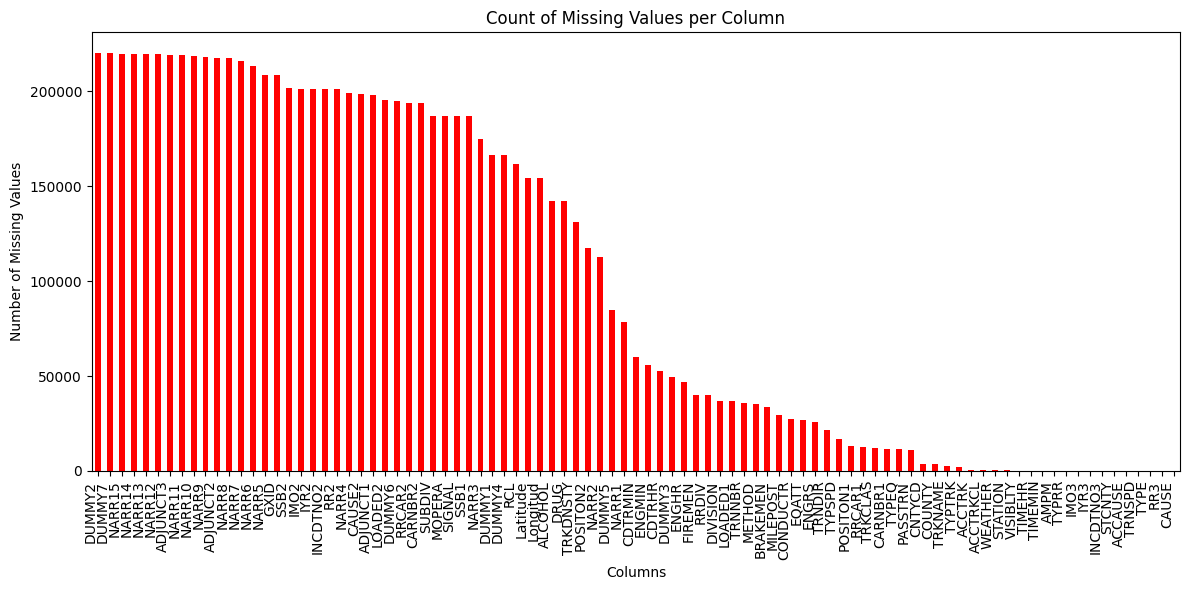


Number of columns that have missing value more than 50%:
43

Columns with missing values MORE than 50%:
DUMMY2      220087
DUMMY7      220047
NARR15      219793
NARR14      219711
NARR13      219606
NARR12      219436
ADJUNCT3    219395
NARR11      219147
NARR10      218770
NARR9       218233
ADJUNCT2    217535
NARR8       217361
NARR7       215994
NARR6       213478
NARR5       208657
GXID        208517
SSB2        201590
IMO2        200983
IYR2        200983
INCDTNO2    200980
RR2         200979
NARR4       199350
CAUSE2      198584
ADJUNCT1    198168
LOADED2     195353
DUMMY6      194805
RRCAR2      194093
CARNBR2     194047
SUBDIV      187155
MOPERA      187138
SIGNAL      187135
SSB1        187032
NARR3       174912
DUMMY1      166489
DUMMY4      166237
RCL         161814
Latitude    154569
Longitud    154553
ALCOHOL     142454
DRUG        142097
TRKDNSTY    131422
POSITON2    117607
NARR2       112833
dtype: int64


In [56]:
def analyze_missing_values(df):
    # Count missing values for column
    missing_per_column = df.isnull().sum()

    # Count missing values for rows
    missing_per_entry = df.isna().sum(axis=1)

    print("Missing values per attribute (column):")
    print(missing_per_column)
    print("\n")

    print("Missing values per entry (row):")
    print(missing_per_entry)
    print("\n")

    # Identify the most relevant missing columns
    print("Most relevant missing attributes:")
    relevant_columns = missing_per_column[missing_per_column > 0].sort_values(ascending=False)
    print(relevant_columns)

    # Suggest which columns may hinder analysis
    if not relevant_columns.empty:
        print("\nColumns with significant missing values that might hinder analysis:")
        for col, count in relevant_columns.items():
            percentage_missing = (count / len(df)) * 100
            print(f"{col}: {count} missing values ({percentage_missing:.2f}%)")
        
        # Plot the count of missing values:
        plt.figure(figsize=(12, 6))
        relevant_columns.plot(kind='bar', color='red')
        plt.title('Count of Missing Values per Column')
        plt.xlabel('Columns')
        plt.ylabel('Number of Missing Values')
        plt.xticks(rotation=90, ha='right')
        plt.tight_layout()
        plt.show()
        
        #Print columns with missing values MORE than 50%
        columns_more_than_50_percent = relevant_columns[relevant_columns > (0.5 * len(df))]
        if not columns_more_than_50_percent.empty:
            print("\nNumber of columns that have missing value more than 50%:")
            print(len(columns_more_than_50_percent))
            print("\nColumns with missing values MORE than 50%:")
            print(columns_more_than_50_percent)
        else:
            print("No columns with missing values MORE than 50%.")

    else:
        print("No missing values detected.")

analyze_missing_values(df_railroad)


In [57]:
duplicates = df_railroad[df_railroad.duplicated()]
print(f"Number of duplicates: {duplicates.shape[0]}")
duplicates.head(1)

Number of duplicates: 5


,IYR,IMO,RAILROAD,INCDTNO,IYR2,IMO2,RR2,INCDTNO2,IYR3,IMO3,RR3,INCDTNO3,DUMMY1,GXID,YEAR,MONTH,DAY,TIMEHR,TIMEMIN,AMPM,TYPE,CARS,CARSDMG,CARSHZD,EVACUATE,DIVISION,STATION,MILEPOST,STATE,TEMP,VISIBLTY,WEATHER,TRNSPD,TYPSPD,TRNNBR,TRNDIR,TONS,TYPEQ,EQATT,TRKNAME,TRKCLAS,TRKDNSTY,TYPTRK,RRCAR1,CARNBR1,POSITON1,LOADED1,RRCAR2,CARNBR2,POSITON2,LOADED2,HEADEND1,MIDMAN1,MIDREM1,RMAN1,RREM1,HEADEND2,MIDMAN2,MIDREM2,RMAN2,RREM2,LOADF1,LOADP1,EMPTYF1,EMPTYP1,CABOOSE1,LOADF2,LOADP2,EMPTYF2,EMPTYP2,CABOOSE2,EQPDMG,TRKDMG,CAUSE,CAUSE2,CASKLDRR,CASINJRR,CASKLD,CASINJ,ACCAUSE,ACCTRK,ACCTRKCL,HIGHSPD,ACCDMG,DUMMY2,STCNTY,TOTINJ,DUMMY3,TOTKLD,ENGRS,FIREMEN,CONDUCTR,BRAKEMEN,ENGHR,ENGMIN,CDTRHR,CDTRMIN,JOINTCD,REGION,DUMMY4,TYPRR,DUMMY5,RRDIV,METHOD,NARRLEN,DUMMY6,YEAR4,RREMPKLD,RREMPINJ,PASSKLD,PASSINJ,OTHERKLD,OTHERINJ,COUNTY,CNTYCD,ALCOHOL,DRUG,DUMMY7,PASSTRN,SSB1,SSB2,NARR1,NARR2,NARR3,NARR4,NARR5,NARR6,NARR7,NARR8,NARR9,NARR10,NARR11,NARR12,NARR13,NARR14,NARR15,RCL,Latitude,Longitud,SIGNAL,MOPERA,ADJUNCT1,ADJUNCT2,ADJUNCT3,SUBDIV,corrected_year
90681,85,8,UP,0885NP001,NaN,NaN,NaN,NaN,85.0,8.0,UP,0885NP001,NaN,NaN,85,8,1,10.0,30.0,AM,4.0,0,0,0,0,NEBRASKA,NORTH PLATTE,NaN,31,69,2.0,2.0,0.0,E,CUT,4,0,6,N,FORWARDING 11,2,NaN,2,UP,078884,24.0,N,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,110,0,0,0,0,2,0,0,2000.0,0.0,H306,NaN,0,1,0,1,H306,2,2,10,368600.0,NaN,31C111,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,6,NaN,1L,0.0,NEBRAS,N,16,NaN,1985,0,0,0,0,0,0,LINCOLN,111.0,NaN,NaN,NaN,N,NaN,NaN,SEE OTHER REPORT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1985


In [87]:
missing_per_column = df_railroad.isnull().sum()
relevant_columns = missing_per_column[missing_per_column > 0].sort_values(ascending=False)
columns_more_than_70_percent = relevant_columns[relevant_columns > (0.7 * len(df_railroad))]
columns_more_than_70_percent
columns_to_drop = columns_more_than_70_percent.index
columns_to_remove = ['NARR1', 'NARR2', 'NARR3', 'NARR4', 'NARR5', 'NARR6', 'NARR7', 
                     'NARR8', 'NARR9', 'NARR10', 'NARR11', 'NARR12', 'NARR13', 
                     'NARR14', 'NARR15', 'NARRLEN','DUMMY7', 'DUMMY6', 'DUMMY5', 'DUMMY4', 'DUMMY3', 'DUMMY2', 'DUMMY1',
                     'ADJUNCT1', 'ADJUNCT2'	,'ADJUNCT3', 'SSB1', 'SSB2', 'YEAR', 'MONTH', 'DAY']

# Drop these columns from the DataFrame
df_railroad_cleaned = df_railroad.drop(columns=columns_to_drop)
df_railroad_cleaned = df_railroad.drop(columns=columns_to_remove)
# Display the cleaned DataFrame
df_railroad_cleaned.head(5)

,IYR,IMO,RAILROAD,INCDTNO,IYR2,IMO2,RR2,INCDTNO2,IYR3,IMO3,RR3,INCDTNO3,GXID,TIMEHR,TIMEMIN,AMPM,TYPE,CARS,CARSDMG,CARSHZD,EVACUATE,DIVISION,STATION,MILEPOST,STATE,TEMP,VISIBLTY,WEATHER,TRNSPD,TYPSPD,TRNNBR,TRNDIR,TONS,TYPEQ,EQATT,TRKNAME,TRKCLAS,TRKDNSTY,TYPTRK,RRCAR1,CARNBR1,POSITON1,LOADED1,RRCAR2,CARNBR2,POSITON2,LOADED2,HEADEND1,MIDMAN1,MIDREM1,RMAN1,RREM1,HEADEND2,MIDMAN2,MIDREM2,RMAN2,RREM2,LOADF1,LOADP1,EMPTYF1,EMPTYP1,CABOOSE1,LOADF2,LOADP2,EMPTYF2,EMPTYP2,CABOOSE2,EQPDMG,TRKDMG,CAUSE,CAUSE2,CASKLDRR,CASINJRR,CASKLD,CASINJ,ACCAUSE,ACCTRK,ACCTRKCL,HIGHSPD,ACCDMG,STCNTY,TOTINJ,TOTKLD,ENGRS,FIREMEN,CONDUCTR,BRAKEMEN,ENGHR,ENGMIN,CDTRHR,CDTRMIN,JOINTCD,REGION,TYPRR,RRDIV,METHOD,YEAR4,RREMPKLD,RREMPINJ,PASSKLD,PASSINJ,OTHERKLD,OTHERINJ,COUNTY,CNTYCD,ALCOHOL,DRUG,PASSTRN,RCL,Latitude,Longitud,SIGNAL,MOPERA,SUBDIV,corrected_year
0,21,8,ARR,2021118,NaN,NaN,NaN,NaN,21.0,8.0,ARR,2021118,NaN,1.0,15.0,PM,9.0,0,0,0,0,NaN,WILLOW,195.1,2,60,2.0,1.0,0.0,E,NaN,1,0,A,Y,MAIN,3,3.1,1,RL,000005,1.0,N,NaN,NaN,0.0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,9949.0,0.0,H102,H402,0,0,0,0,H102,1,3,15,15675.0,02C170,0,0,1.0,0.0,0.0,0.0,8.0,NaN,NaN,NaN,1,8,2,NaN,NaN,2021,0,0,0,0,0,0,MATANUSKA SUSITNA,170.0,0.0,0.0,N,0,62.0506,-150.0763,1.0,1,SYSTEM,2021
1,21,4,ARR,2021075,NaN,NaN,NaN,NaN,21.0,4.0,ARR,2021075,NaN,3.0,0.0,PM,5.0,0,0,0,0,NaN,FAIRBANKS,G16.4,2,50,2.0,1.0,5.0,E,459,1,2724,7,Y,EIELSON BRANCH G16.4,1,NaN,4,GATX,206895,1.0,Y,NaN,NaN,0.0,NaN,0,0,0,2,0,0,0,0,0,0,25,0,0,0,0,0,0,0,0,0,60000.0,0.0,H307,H302,0,0,0,0,H307,4,1,5,60000.0,02C090,0,0,1.0,0.0,1.0,1.0,4.0,NaN,4.0,NaN,1,8,2,NaN,NaN,2021,0,0,0,0,0,0,FAIRBANKS NORTH STAR,90.0,NaN,NaN,N,0,64.7500,-147.3600,2.0,5,SYSTEM,2021
2,7,1,IC,543854,NaN,NaN,NaN,NaN,7.0,1.0,CAEZ,INDUSTRY,NaN,7.0,10.0,AM,1.0,0,0,0,0,CENTRAL,RESERVE,420.50,22,56,2.0,2.0,4.0,E,RNO1,2,14100,1,Y,#4 SWITCH AT CARGILL,1,NaN,4,CGEX,002000,70.0,Y,NaN,NaN,0.0,NaN,2,0,0,0,0,0,0,0,0,0,101,0,0,0,0,3,0,0,0,0,5220.0,4766.0,T311,NaN,0,0,0,0,T311,4,1,4,9986.0,22C095,0,0,1.0,0.0,1.0,1.0,10.0,28.0,10.0,28.0,1,5,1L,CENTRA,N,2007,0,0,0,0,0,0,ST JOHN THE BAPTIST,95.0,NaN,NaN,N,0,0.0000,0.0000,NaN,NaN,NaN,2007
3,20,2,ARR,2020027,NaN,NaN,NaN,NaN,20.0,2.0,ARR,2020027,NaN,11.0,41.0,AM,13.0,0,0,0,0,NaN,CANTWELL,313.9,2,-10,2.0,6.0,2.0,E,NaN,2,0,A,Y,MAIN,3,3.04,1,SPR,000009,1.0,N,SPR,9.0,1.0,N,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,14835.0,0.0,M101,E99C,0,0,0,0,M101,1,3,2,14835.0,02C068,0,0,1.0,0.0,1.0,0.0,10.0,NaN,10.0,NaN,1,8,2,NaN,NaN,2020,0,0,0,0,0,0,DENALI,68.0,0.0,0.0,N,0,63.3913,-148.9515,2.0,2,SYSTEM,2020
4,24,5,ARR,2024084,NaN,NaN,NaN,NaN,24.0,5.0,ARR,2024084,NaN,10.0,13.0,PM,12.0,0,0,0,0,NaN,WASILLA,157.3,2,45,4.0,2.0,24.0,R,130N,1,7276,1,Y,MP157.8,3,NaN,1,ARR,004004,1.0,N,NaN,NaN,0.0,N,5,0,0,0,0,0,0,0,0,0,62,0,0,0,0,0,0,0,0,0,0.0,0.0,M505,NaN,0,0,0,0,M505,1,3,24,0.0,02C170,0,1,1.0,0.0,1.0,0.0,1.0,45.0,1.0,45.0,1,8,2,NaN,NaN,2024,0,0,0,0,1,0,MATANUSKA SUSITNA,170.0,0.0,0.0,N,0,61.5717,-149.3948,1.0,1,CENTRAL,2024


In [94]:
print('Missing values distribution: ')
print(df_railroad_cleaned.isnull().mean())
print("")

Missing values distribution: 
IYR               0.000000
IMO               0.000000
RAILROAD          0.000000
INCDTNO           0.000000
IYR2              0.913198
                    ...   
Longitud          0.702236
SIGNAL            0.850277
MOPERA            0.850291
SUBDIV            0.850368
corrected_year    0.000000
Length: 115, dtype: float64



In [100]:
df_railroad_cleaned['RAILROAD'].unique()

array(['ARR', 'IC', 'NS', ..., 'WN', 'RJCV', 'BEEM'], dtype=object)